In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm


import warnings
warnings.filterwarnings('ignore')    

### Load the Dataset:

In [2]:
df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


### Check the Dimensions

In [3]:
print(df.shape)
print(40 * '*')
print(df.describe())
print(40 * '*')
print(df.info())


(3998, 39)
****************************************
                 ID        Salary  10percentage  12graduation  12percentage  \
count  3.998000e+03  3.998000e+03   3998.000000   3998.000000   3998.000000   
mean   6.637945e+05  3.076998e+05     77.925443   2008.087544     74.466366   
std    3.632182e+05  2.127375e+05      9.850162      1.653599     10.999933   
min    1.124400e+04  3.500000e+04     43.000000   1995.000000     40.000000   
25%    3.342842e+05  1.800000e+05     71.680000   2007.000000     66.000000   
50%    6.396000e+05  3.000000e+05     79.150000   2008.000000     74.400000   
75%    9.904800e+05  3.700000e+05     85.670000   2009.000000     82.600000   
max    1.298275e+06  4.000000e+06     97.760000   2013.000000     98.700000   

          CollegeID  CollegeTier   collegeGPA  CollegeCityID  CollegeCityTier  \
count   3998.000000  3998.000000  3998.000000    3998.000000      3998.000000   
mean    5156.851426     1.925713    71.486171    5156.851426         0.300

#### Here next step in the process is to check for the null values in the dataset 

In [4]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

#### Here we are checking for duplicate value in dataset

In [5]:
df.duplicated().sum()

0

#### Here we are transforming the column name by using strip and lower function and as well droping the unwanted columns

In [6]:
df.columns = df.columns.str.strip().str.lower()

In [7]:
df = df.drop(columns = ['unnamed: 0'])


In [8]:
columns_to_drop = ['id', 'collegeid', 'collegecityid']  
df.drop(columns=columns_to_drop, inplace=True)

#### Datatype conversion

* Here we can see from below we  have three date format where doj and dob are in datetime datatype but dol is in object. So Here we are broadcasting dol to datetime datatype by replacing present woth the 2015-12-31 has it is taken in 2015

* Data Types: Checking the data types of each variable using .info() to ensure they are interpreted correctly (e.g., dates should be in datetime format, categorical variables should be in category format).

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   salary                 3998 non-null   int64         
 1   doj                    3998 non-null   datetime64[ns]
 2   dol                    3998 non-null   object        
 3   designation            3998 non-null   object        
 4   jobcity                3998 non-null   object        
 5   gender                 3998 non-null   object        
 6   dob                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  collegetier            3998 non-null   int64         
 13  deg

In [10]:
df.head(20)

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
5,300000,2014-06-01,present,system engineer,Hyderabad,m,1992-07-02,89.92,state board,2010,...,407,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608
6,300000,2014-08-01,2015-05-01 00:00:00,java software engineer,Banglore,m,1993-02-01,86.08,state board,2010,...,346,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.00920,-1.0872
7,400000,2014-07-01,2015-07-01 00:00:00,mechanical engineer,Bangalore,m,1992-05-27,92.00,cbse,2010,...,-1,469,-1,-1,-1,-0.0154,1.2114,0.0100,0.14590,1.2470
8,600000,2013-07-01,present,electrical engineer,Noida,m,1991-09-17,90.00,cbse,2009,...,-1,-1,-1,-1,-1,-0.1590,0.5454,-0.6048,-0.74150,-0.2859
9,230000,2014-07-01,present,project engineer,Kolkata,m,1993-06-13,77.00,cbse,2010,...,-1,-1,-1,-1,-1,-1.3080,0.5454,-0.9122,0.90660,0.0973


In [11]:
import datetime as dt

df['dol'].replace('present', dt.datetime.today(),inplace = True)
df['dol'] = pd.to_datetime(df['dol']).dt.date
df['12graduation'] = pd.to_datetime(df['12graduation']).dt.year
df['graduationyear'] = pd.to_datetime(df['graduationyear']).dt.year

In [12]:
df['period'] = pd.to_datetime(df['dol']).dt.year - pd.to_datetime(df['doj']).dt.year
df['period'].unique()

array([12, 11, 10, 13,  1,  4,  3,  0,  2,  9,  5, 14, 18,  6, 33, 17],
      dtype=int64)

In [13]:
df['collegetier'] = df['collegetier'].astype(object)
df['collegecitytier'] = df['collegecitytier'].astype(object)

In [14]:
df['collegetier'].unique()

array([2, 1], dtype=object)

#### Here we are replacing the values with consisting values for better performance of the dataset

In [15]:
df['collegecitytier'].replace({'0':'No', '1':'Yes'},inplace = True)
df['collegetier'].replace({'1':'tire_one','2':'tire_two'},inplace = True)

In [16]:
df['designation'].value_counts()

software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: designation, Length: 419, dtype: int64

In [17]:
# converting gpa to percentage 

gpa = df.loc[df['collegegpa']<=10,'collegegpa'].index
df.iloc[gpa]['collegegpa']

7       8.58
138     6.63
788     6.80
1419    6.85
1439    8.07
1767    7.56
2151    6.95
2229    8.13
2293    9.30
2662    8.88
2691    8.89
3308    6.45
Name: collegegpa, dtype: float64

In [18]:
df.loc[df['collegegpa'] <= 10, 'collegegpa'] *= 10
df['collegegpa'] = df['collegegpa'].clip(upper=100)

In [19]:
categorical_columns = ['designation','jobcity','gender','10board','12board','degree','specialization','collegestate','collegecitytier', 'collegetier']
numerical_columns = ['salary','10percentage','12percentage','collegegpa','english','logical','quant','domain','computerprogramming','electronicsandsemicon','computerscience','mechanicalengg','electricalengg','telecomengg','civilengg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']

demographic_info = ['designation','gender','10board','12board','degree','specialization','collegestate']
Amcat_score = ['english','logical','quant','domain','computerprogramming','electronicsandsemicon','computerscience','mechanicalengg','electricalengg','telecomengg','civilengg','conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']
personality_test = ['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']

### Here we are replacing data having '0' and '-1' with null values for demographic_info, jobcity and domain

In [20]:
for column in demographic_info:
    df[column].replace(0, np.nan, inplace=True)

In [21]:
df['jobcity'] = df['jobcity'].replace({'-1':np.nan})
df['domain'] = df['domain'].replace({-1:np.nan})
    

### Mapping the value to appropriate values in the 10board column

In [22]:
replace_list_state=['board of intermediate education,ap', 'state board',
       'mp board',  'karnataka pre university board', 'up',
       'p u board, karnataka', 'dept of pre-university education', 'bie',
       'kerala state hse board', 'up board', 'bseb', 'chse', 'puc',
       ' upboard',
       'state  board of intermediate education, andhra pradesh',
       'karnataka state board',
       'west bengal state council of technical education', 'wbchse',
       'maharashtra state board', 'ssc',
       'sda matric higher secondary school', 'uttar pradesh board', 'ibe',
       'chsc', 'board of intermediate', 'upboard', 'sbtet',
       'hisher seconadry examination(state board)', 'pre university',
       'borad of intermediate', 'j & k board',
       'intermediate board of andhra pardesh', 'rbse',
       'central board of secondary education', 'jkbose', 'hbse',
       'board of intermediate education', 'state', 'ms board', 'pue',
       'intermediate state board', 'stateboard', 'hsc',
       'electonincs and communication(dote)', 'karnataka pu board',
       'government polytechnic mumbai , mumbai board', 'pu board',
       'baord of intermediate education', 'apbie', 'andhra board',
       'tamilnadu stateboard',
       'west bengal council of higher secondary education',
       'cbse,new delhi', 'u p board', 'intermediate', 'biec,patna',
       'diploma in engg (e &tc) tilak maharashtra vidayapeeth',
       'hsc pune', 'pu board karnataka', 'kerala', 'gsheb',
       'up(allahabad)', 'nagpur', 'st joseph hr sec school',
       'pre university board', 'ipe', 'maharashtra', 'kea', 'apsb',
       'himachal pradesh board of school education', 'staae board',
       'international baccalaureate (ib) diploma', 'nios',
       'karnataka board of university',
       'board of secondary education rajasthan', 'uttarakhand board',
       'ua', 'scte vt orissa', 'matriculation',
       'department of pre-university education', 'wbscte',
       'preuniversity board(karnataka)', 'jharkhand accademic council',
       'bieap', 'msbte (diploma in computer technology)',
       'jharkhand acamedic council (ranchi)',
       'department of pre-university eduction', 'biec',
       'sjrcw', ' board of intermediate', 'msbte',
       'sri sankara vidyalaya', 'chse, odisha', 'bihar board',
       'maharashtra state(latur board)', 'rajasthan board', 'mpboard',
       'state board of technical eduction panchkula', 'upbhsie', 'apbsc',
       'state board of technical education and training',
       'secondary board of rajasthan',
       'tamilnadu higher secondary education board',
       'jharkhand academic council',
       'board of intermediate education,hyderabad', 'up baord', 'pu',
       'dte', 'board of secondary education', 'pre-university',
       'board of intermediate education,andhra pradesh',
       'up board , allahabad', 'srv girls higher sec school,rasipuram',
       'intermediate board of education,andhra pradesh',
       'intermediate board examination',
       'department of pre-university education, bangalore',
       'stmiras college for girls', 'mbose',
       'department of pre-university education(government of karnataka)',
       'dpue', 'msbte pune', 'board of school education harayana',
       'sbte, jharkhand', 'bihar intermediate education council, patna',
       'higher secondary', 's j polytechnic', 'latur',
       'board of secondary education, rajasthan', 'jyoti nivas', 'pseb',
       'biec-patna', 'board of intermediate education,andra pradesh',
       'chse,orissa', 'pre-university board', 'mp', 'intermediate board',
       'govt of karnataka department of pre-university education',
       'karnataka education board',
       'board of secondary school of education', 'pu board ,karnataka',
       'karnataka secondary education board', 'karnataka sslc',
       'board of intermediate ap', 'u p', 'state board of karnataka',
       'directorate of technical education,banglore', 'matric board',
       'andhpradesh board of intermediate education',
       'stjoseph of cluny matrhrsecschool,neyveli,cuddalore district',
       'bte up', 'scte and vt ,orissa', 'hbsc',
       'jawahar higher secondary school', 'nagpur board', 'bsemp',
       'board of intermediate education, andhra pradesh',
       'board of higher secondary orissa',
       'board of secondary education,rajasthan(rbse)',
       'board of intermediate education:ap,hyderabad', 'science college',
       'karnatak pu board', 'aissce', 'pre university board of karnataka',
       'bihar', 'kerala state board', 'uo board', 
       'karnataka board', 'tn state board',
       'kolhapur divisional board, maharashtra',
       'jaycee matriculation school',
       'board of higher secondary examination, kerala',
       'uttaranchal state board', 'intermidiate', 'bciec,patna', 'bice',
       'karnataka state', 'state broad', 'wbbhse', 'gseb',
       'uttar pradesh', 'ghseb', 'board of school education uttarakhand',
       'gseb/technical education board', 'msbshse,pune',
       'tamilnadu state board', 'board of technical education',
       'kerala university', 'uttaranchal shiksha avam pariksha parishad',
       'chse(concil of higher secondary education)',
       'bright way college, (up board)', 'board of intermidiate',
       'higher secondary state certificate', 'karanataka secondary board',
       'maharashtra board', 'cgbse', 'diploma in computers', 'bte,delhi',
       'rajasthan board ajmer', 'mpbse', 'pune board',
       'state board of technical education', 'gshseb',
       'amravati divisional board', 'dote (diploma - computer engg)',
       'karnataka pre-university board', 'jharkhand board',
       'punjab state board of technical education & industrial training',
       'department of technical education',
       'sri chaitanya junior kalasala', 'state board (jac, ranchi)',
       'aligarh muslim university', 'tamil nadu state board', 'hse',
       'karnataka secondary education', 'state board ',
       'karnataka pre unversity board',
       'ks rangasamy institute of technology',
       'karnataka board secondary education', 'narayana junior college',
       'bteup', 'board of intermediate(bie)', 'hsc maharashtra board',
       'tamil nadu state', 'uttrakhand board', 'psbte',
       'stateboard/tamil nadu', 'intermediate council patna',
       'technical board, punchkula', 'board of intermidiate examination',
       'sri kannika parameswari highier secondary school, udumalpet',
       'ap board', 'nashik board', 'himachal pradesh board',
       'maharashtra satate board',
       'andhra pradesh board of secondary education',
       'tamil nadu polytechnic',
       'maharashtra state board mumbai divisional board',
       'department of pre university education',
       'dav public school,hehal', 'board of intermediate education, ap',
       'rajasthan board of secondary education',
       'department of technical education, bangalore', 'chse,odisha',
       'maharashtra nasik board',
       'west bengal council of higher secondary examination (wbchse)',
       'holy cross matriculation hr sec school', 'cbsc',
       'pu  board karnataka', 'biec patna', 'kolhapur', 'bseb, patna',
       'up board allahabad', 'nagpur board,nagpur', 'diploma(msbte)',
       'dav public school', 'pre university board, karnataka',
       'ssm srsecschool', 'state bord', 'jstb,jharkhand',
       'intermediate board of education', 'mp board bhopal', 'pub',
       'madhya pradesh board', 'bihar intermediate education council',
       'west bengal council of higher secondary eucation',
        'mpc',
       'certificate for higher secondary education (chse)orissa',
       'maharashtra state board for hsc',
       'board of intermeadiate education', 'latur board',
       'andhra pradesh', 'karnataka pre-university',
       'lucknow public college', 'nagpur divisional board',
       'ap intermediate board', 'cgbse raipur', 'uttranchal board',
       'jiec', 
       'bihar school examination board patna',
       'state board of technical education harayana', 'mp-bse',
       'up bourd', 'dav public school sec 14',
       'haryana state board of technical education chandigarh',
       'council for indian school certificate examination',
       'jaswant modern school', 'madhya pradesh open school',
       'aurangabad board', 'j&k state board of school education',
       'diploma ( maharashtra state board of technical education)',
       'board of technicaleducation ,delhi',
       'maharashtra state boar of secondary and higher secondary education',
       'hslc (tamil nadu state board)',
       'karnataka state examination board', 'puboard', 'nasik',
       'west bengal board of higher secondary education',
       'up board,allahabad', 'board of intrmediate education,ap', 
       'karnataka state pre- university board',
       'state board - west bengal council of higher secondary education : wbchse',
       'maharashtra state board of secondary & higher secondary education',
       'biec, patna', 'state syllabus', 'cbse board', 'scte&vt',
       'board of intermediate,ap',
       'secnior secondary education board of rajasthan',
       'maharashtra board, pune', 'rbse (state board)',
       'board of intermidiate education,ap',
       'board of high school and intermediate education uttarpradesh',
       'higher secondary education',
       'board fo intermediate education, ap', 'intermedite',
       'ap board for intermediate education', 'ahsec',
       'punjab state board of technical education & industrial training, chandigarh',
       'state board - tamilnadu', 'jharkhand acedemic council',
       'scte & vt (diploma)', 'karnataka pu',
       'board of intmediate education ap', 'up-board',
       'boardofintermediate','intermideate','up bord','andhra pradesh state board','gujarat board']


replace_list_cbse=['cbse', 
       'all india board', 
       'central board of secondary education, new delhi', 'cbese']



replace_list_icse=[ 'isc', 'icse', 'isc board', 'isce', 'cicse',
       'isc board , new delhi']

In [23]:

# Replace state boards
for state_board in replace_list_state:
    df['12board'].replace(state_board, 'state', inplace=True)

# Replace CBSE
for cbse_variant in replace_list_cbse:
    df['12board'].replace(cbse_variant, 'cbse', inplace=True)

# Replace ICSE
for icse_variant in replace_list_icse:
    df['12board'].replace(icse_variant, 'icse', inplace=True)

print(df['12board'].unique())


['state' 'cbse' 'icse' nan]


### Designation column has get as a nan value so replacing the get value with the most frequent value by using mode 

In [24]:
df[df["designation"]=="get"][['designation','jobcity','salary','specialization']]

,designation,jobcity,salary,specialization
4,get,Manesar,200000,electronics and communication engineering
332,get,-1,180000,mechanical and automation
350,get,Faridabad,340000,electrical engineering
1717,get,Hyderabad,145000,mechanical engineering
1897,get,Hyderabad,175000,mechanical engineering
2140,get,Indore,600000,mechanical engineering
2318,get,Lucknow,220000,electronics and electrical engineering
2443,get,kharagpur,110000,mechanical engineering
2666,get,Hyderabad,200000,electronics and electrical engineering
2757,get,Nashik,350000,mechanical engineering


* Here we can see most of them are from mechanical engineering and next to it is electronics and electrical engineering

In [25]:
mech = df[df['specialization'].isin(['mechanical engineering','mechanical and automation'])]['designation'].mode()[0]
#for people with electronics and electrical engineering,it gives the mode value which will be replaced with the 'get'.
eee = df[df['specialization']==('electronics and electrical engineering')]['designation'].mode()[0]

print(mech)
print(eee)

production engineer
system engineer


* for EEE domain,as all previous get's will be replaced,we can replace the remaining directly without conditions

In [26]:
df.loc[df['specialization'].isin(['mechanical engineering','mechanical and automation']), 'designation'].replace('get', 'mech', inplace=True)

df['designation'].replace('get', 'eee', inplace=True)

In [27]:
#### Mapping the values to the specialization column for better understanding and considering them in main streams

In [28]:
specialization_map = \
{'electronics and communication engineering' : 'electronics',
 'computer science & engineering' : 'computer_science',
 'information technology' : 'information_technology' ,
 'computer engineering' : 'computer_science',
 'computer application' : 'computer_science',
 'mechanical engineering' : 'mechanical',
 'electronics and electrical engineering' : 'electronics',
 'electronics & telecommunications' : 'electronics',
 'electrical engineering' : 'electrical',
 'electronics & instrumentation eng' : 'electronics',
 'civil engineering' : 'civil',
 'electronics and instrumentation engineering' : 'electronics',
 'information science engineering' : 'information_technology',
 'instrumentation and control engineering' : 'electronics',
 'electronics engineering' : 'electronics',
 'biotechnology' : 'other',
 'other' : 'other',
 'industrial & production engineering' : 'other',
 'chemical engineering' : 'other',
 'applied electronics and instrumentation' : 'electronics',
 'computer science and technology' : 'computer_science',
 'telecommunication engineering' : 'electronics',
 'mechanical and automation' : 'mechanical',
 'automobile/automotive engineering' : 'mechanical',
 'instrumentation engineering' : 'other',
 'mechatronics' : 'mechanical',
 'electronics and computer engineering' : 'computer_science',
 'aeronautical engineering' : 'mechanical',
 'computer science' : 'computer_science',
 'metallurgical engineering' : 'other',
 'biomedical engineering' : 'other',
 'industrial engineering' : 'other',
 'information & communication technology' : 'information_technology',
 'electrical and power engineering' : 'elctrical',
 'industrial & management engineering' : 'other',
 'computer networking' : 'computer_science',
 'embedded systems technology' : 'electronics',
 'power systems and automation' : 'electrical',
 'computer and communication engineering' : 'computer_science',
 'information science' : 'information_technology',
 'internal combustion engine' : 'mechanical',
 'ceramic engineering' : 'other',
 'mechanical & production engineering' : 'mechanical',
 'control and instrumentation engineering' : 'electronics',
 'polymer technology' : 'other',
 'electronics' : 'electronics'}

In [29]:
df['specialization'] = df['specialization'].map(specialization_map)
df['specialization'].unique()

array(['computer_science', 'electronics', 'information_technology',
       'mechanical', 'electrical', 'civil', 'other', 'elctrical'],
      dtype=object)

#### here we are imputing categorical columns with mode values 

In [30]:
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

#### here we are imputing numerical columns with median value

In [31]:
for column in numerical_columns:
    df[column].fillna(df[column].mode()[0],inplace=True)

### Non Visualization Analysis:


In [32]:
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'period'],
      dtype='object')

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   salary                 3998 non-null   int64         
 1   doj                    3998 non-null   datetime64[ns]
 2   dol                    3998 non-null   object        
 3   designation            3998 non-null   object        
 4   jobcity                3998 non-null   object        
 5   gender                 3998 non-null   object        
 6   dob                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  collegetier            3998 non-null   int64         
 13  deg

### Visualization Analysis

### functions

In [34]:
# Non-Visual Univariate Analysis
# Categorical data
def categorical_data(data):
    for col in data:
        print('*'*30, col, '*'*30,'\n')
        print(data[col].agg(['count', 'unique', 'nunique']))
        print(data[col].value_counts())
        print()

# Numerical data
def numerical_data(data):
    for col in data:
        print('*'*30, col, '*'*30, '\n')
        print(data[col].agg(['count', 'min','max', 'mean', 'median', 'std', 'skew', 'kurt']))
        print()


# Visual Univariate Analysis
# Categorical

def discrete_viz_analysis(data):
    '''
    This function performs a complete visual 
    analysis of discrete data (categorical and numerical).
    '''
    for col in data:
        fig, ax = plt.subplots(figsize=(3,4), constrained_layout=True)
        fig.suptitle("Discrete Distribution")
        
        ax.set_title(col)
        sns.countplot(x=data[col], ax=ax)
        
        plt.xticks(rotation=90)
        
        plt.legend()

        plt.show()


### here we are performing statistical analysis with categorical and numerical columns

In [35]:
categorical_data(df[categorical_columns])

****************************** designation ****************************** 

count                                                   3998
unique     [senior quality engineer, assistant manager, s...
nunique                                                  419
Name: designation, dtype: object
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: designation, Length: 419, dtype: int64

****************************** jobcity ****************************** 

count                                                   3998
unique     [Bangalore, Indore, Chennai, Gurgaon, Manesar,...
nunique          

In [36]:
numerical_data(df[numerical_columns])

****************************** salary ****************************** 

count     3.998000e+03
min       3.500000e+04
max       4.000000e+06
mean      3.076998e+05
median    3.000000e+05
std       2.127375e+05
skew      6.451081e+00
kurt      8.093000e+01
Name: salary, dtype: float64

****************************** 10percentage ****************************** 

count     3998.000000
min         43.000000
max         97.760000
mean        77.925443
median      79.150000
std          9.850162
skew        -0.591019
kurt        -0.110284
Name: 10percentage, dtype: float64

****************************** 12percentage ****************************** 

count     3998.000000
min         40.000000
max         98.700000
mean        74.466366
median      74.400000
std         10.999933
skew        -0.032607
kurt        -0.630737
Name: 12percentage, dtype: float64

****************************** collegegpa ****************************** 

count     3998.000000
min         49.070000
max         99.930

In [38]:
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'period'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


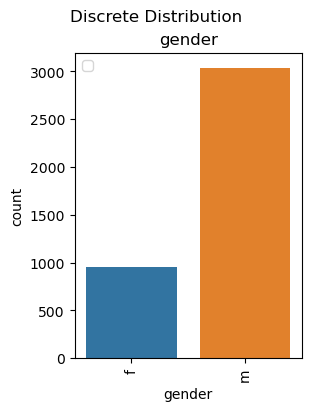

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


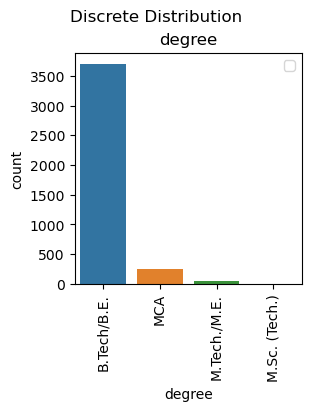

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


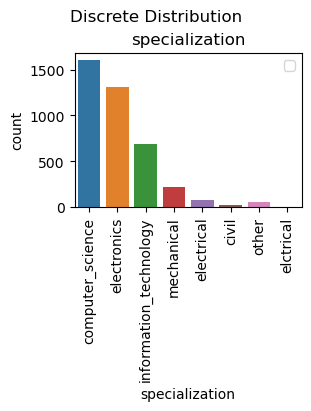

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


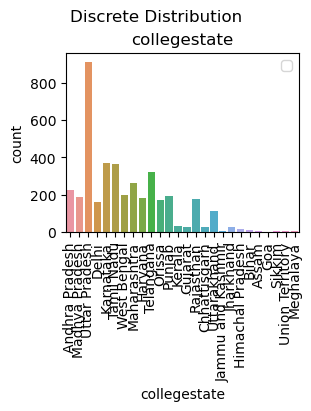

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


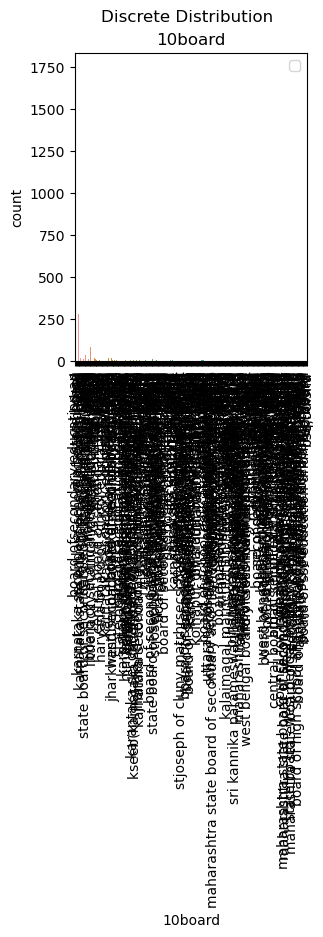

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


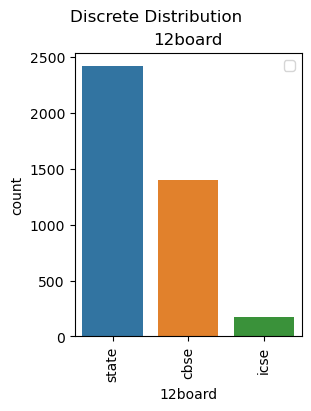

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


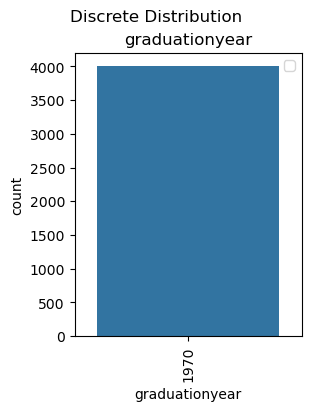

In [40]:
discrete_viz_analysis(data=df[['gender','degree','specialization','collegestate','10board','12board','graduationyear']])

* here from above we can observe that from the gender column male has higher salary compared to females.
* Most of the salary is paid to the Btech studying students
* Most of the studnets was given to the computer science engineering
* Uttar Pradesh is the top college state from where most students are graduated and has salaries

#### Univariate on Numerical Columns

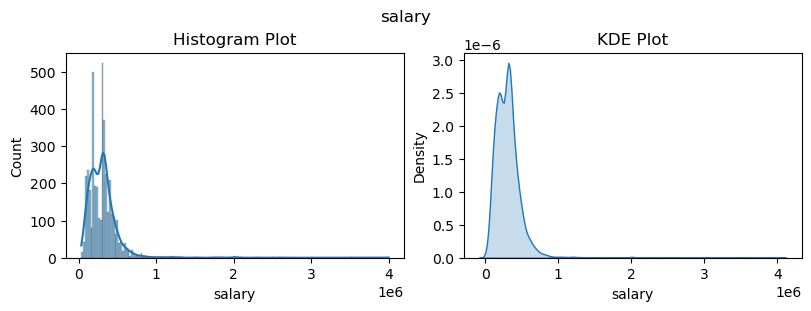

In [41]:
fig, axes = plt.subplots(1,2,figsize=(8, 3), constrained_layout=True)
fig.suptitle('salary')
    
axes[0].set_title("Histogram Plot")
sns.histplot(df['salary'], ax=axes[0], kde=True)
    
axes[1].set_title("KDE Plot")
sns.kdeplot(df['salary'], fill=True, ax=axes[1])

plt.show()

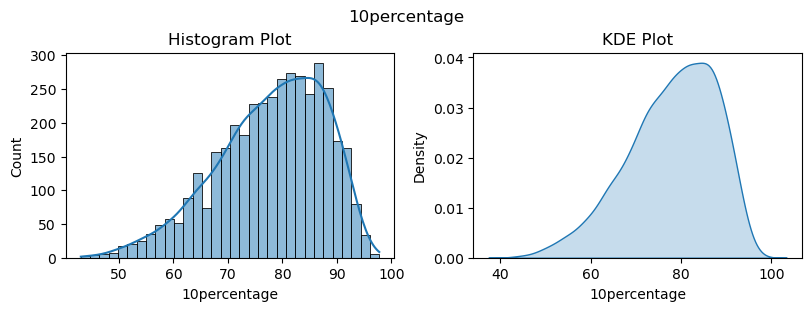

In [69]:
fig, axes = plt.subplots(1,2,figsize=(8, 3), constrained_layout=True)
fig.suptitle('10percentage')
    
axes[0].set_title("Histogram Plot")
sns.histplot(df['10percentage'], ax=axes[0], kde=True)
    
axes[1].set_title("KDE Plot")
sns.kdeplot(df['10percentage'], fill=True, ax=axes[1])

plt.show()

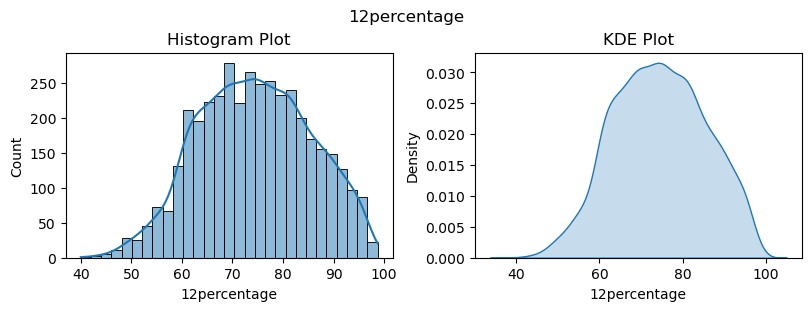

In [43]:
fig, axes = plt.subplots(1,2,figsize=(8, 3), constrained_layout=True)
fig.suptitle('12percentage')
    
axes[0].set_title("Histogram Plot")
sns.histplot(df['12percentage'], ax=axes[0], kde=True)
    
axes[1].set_title("KDE Plot")
sns.kdeplot(df['12percentage'], fill=True, ax=axes[1])

plt.show()

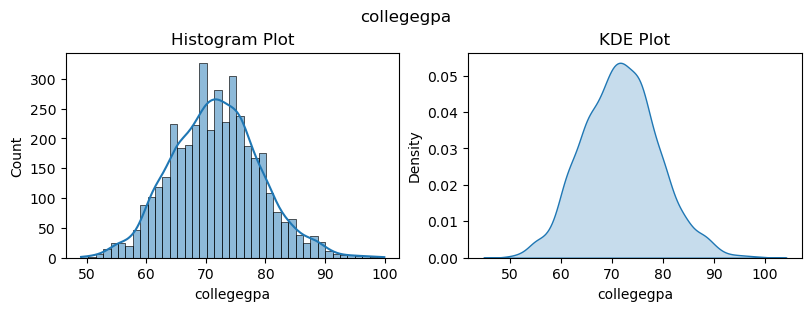

In [44]:
fig, axes = plt.subplots(1,2,figsize=(8, 3), constrained_layout=True)
fig.suptitle('collegegpa')
    
axes[0].set_title("Histogram Plot")
sns.histplot(df['collegegpa'], ax=axes[0], kde=True)
    
axes[1].set_title("KDE Plot")
sns.kdeplot(df['collegegpa'], fill=True, ax=axes[1])

plt.show()

* Here from above histogram and kde plot we can say that most of the students scored 75% in their college.

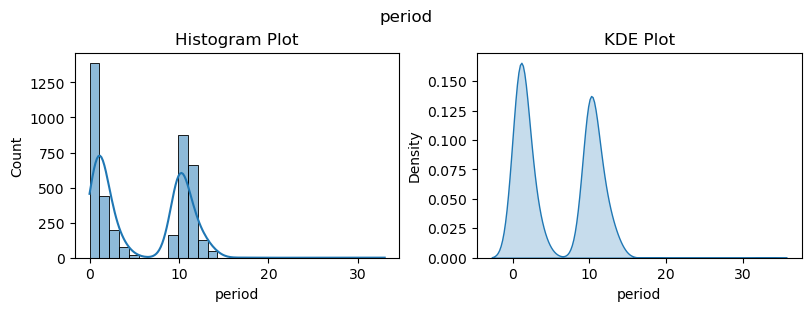

In [45]:
fig, axes = plt.subplots(1,2,figsize=(8, 3), constrained_layout=True)
fig.suptitle('period')
    
axes[0].set_title("Histogram Plot")
sns.histplot(df['period'], ax=axes[0], kde=True)
    
axes[1].set_title("KDE Plot")
sns.kdeplot(df['period'], fill=True, ax=axes[1])

plt.show()

### Bi- Variate Analysis

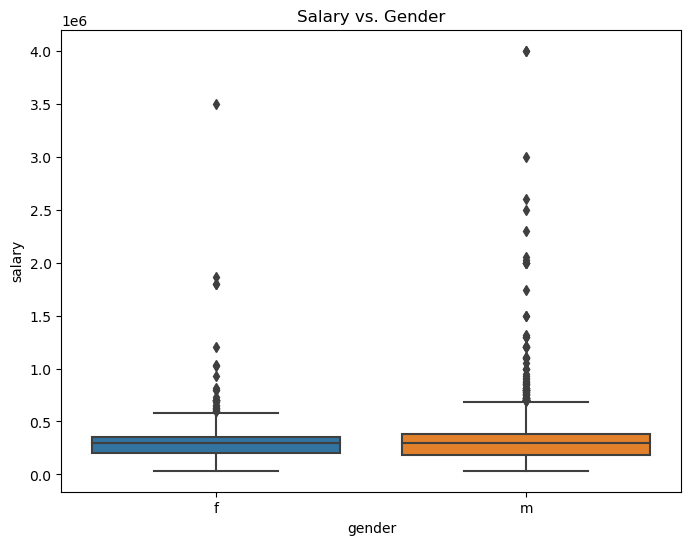

In [46]:
# Box plot: Salary vs. Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='salary', data=df)
plt.title('Salary vs. Gender')
plt.show()



* It is noted that there are many outliers in the salary data
* There is not much difference between median salary for both genders.
* We can also observe male have more outliers indicating they are more people getting higher pays in male than female category

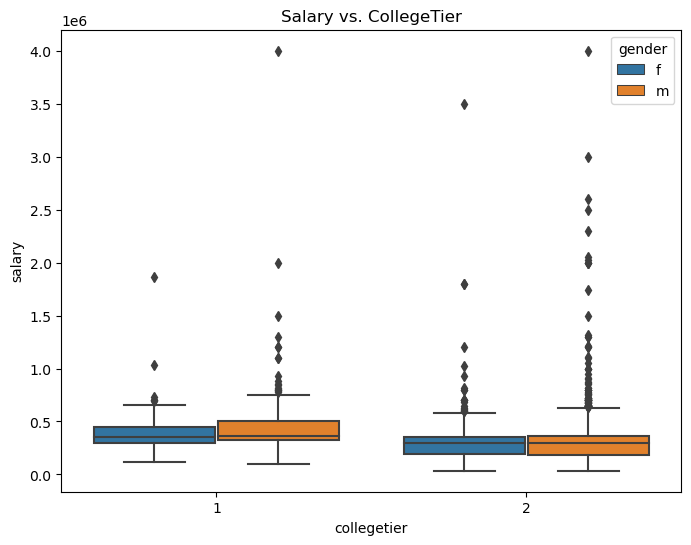

In [47]:
# Box plot: Salary vs. CollegeTier
plt.figure(figsize=(8, 6))
sns.boxplot(x='collegetier', y='salary', hue='gender', data=df)
plt.title('Salary vs. CollegeTier')
plt.show()




* Tier 1 represent a higher level of performance with high salary compared to Tier 2. Therefore, lower values in Tier 2 could suggest a lower level of performance and salary.

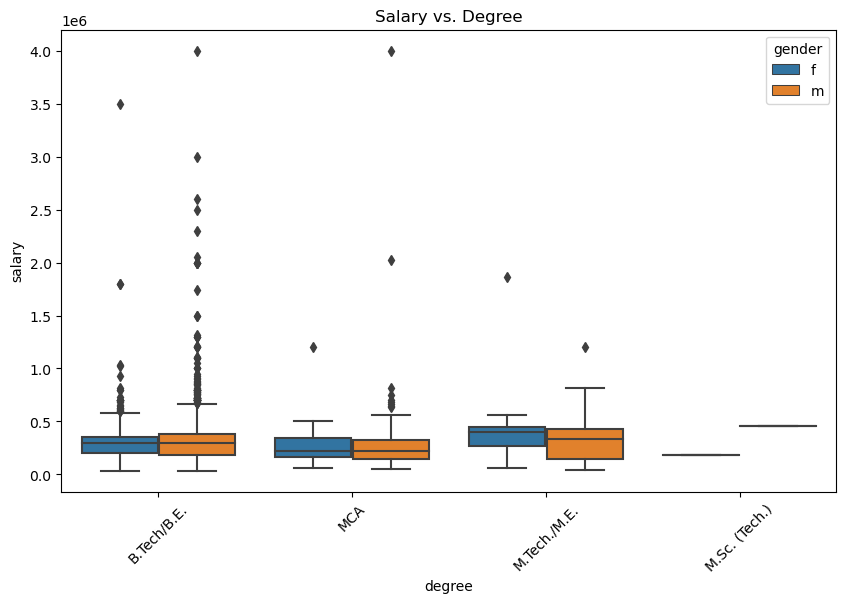

In [48]:
# Box plot: Salary vs. Degree
plt.figure(figsize=(10, 6))
sns.boxplot(x='degree', y='salary', hue='gender', data=df)
plt.xticks(rotation=45)
plt.title('Salary vs. Degree')
plt.show()




* •	Here we can see that students having BTech degree have more number jobs and by outliers we can that high salaries are paid to them. Whereas for Mtech least salary are paid to female compared with males


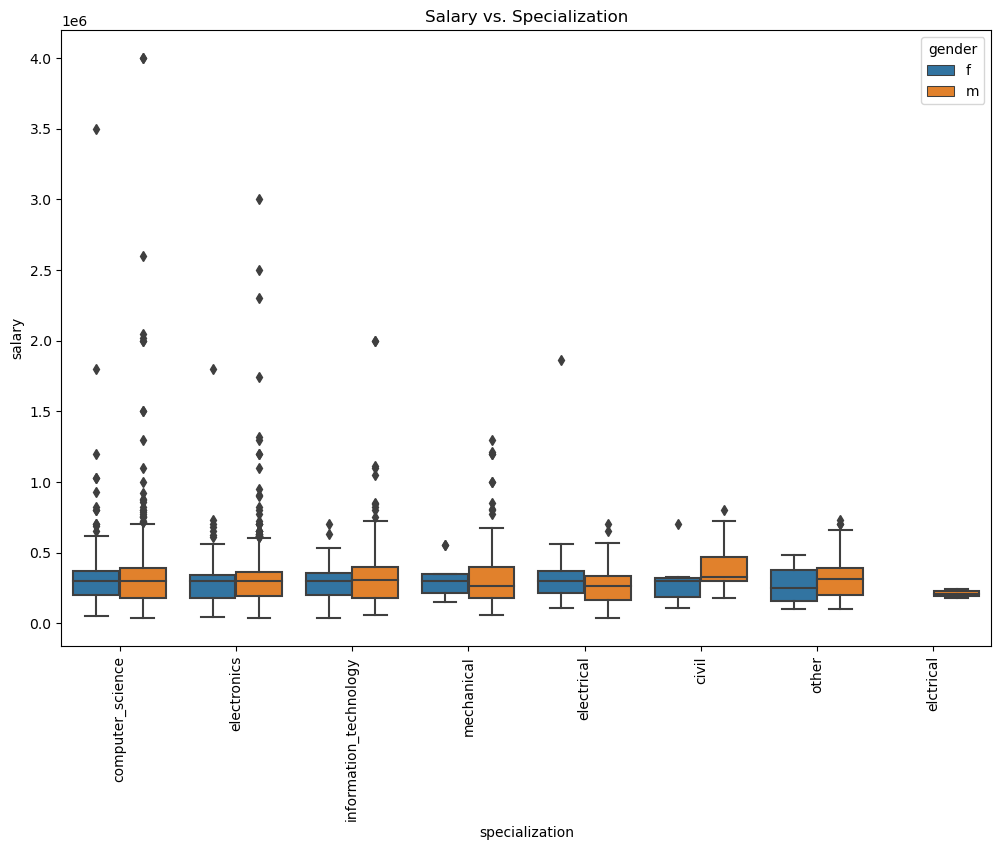

In [49]:
# Box plot: Salary vs. Specialization
plt.figure(figsize=(12, 8))
sns.boxplot(x='specialization', y='salary', hue='gender', data=df)
plt.xticks(rotation=90)
plt.title('Salary vs. Specialization')
plt.show()

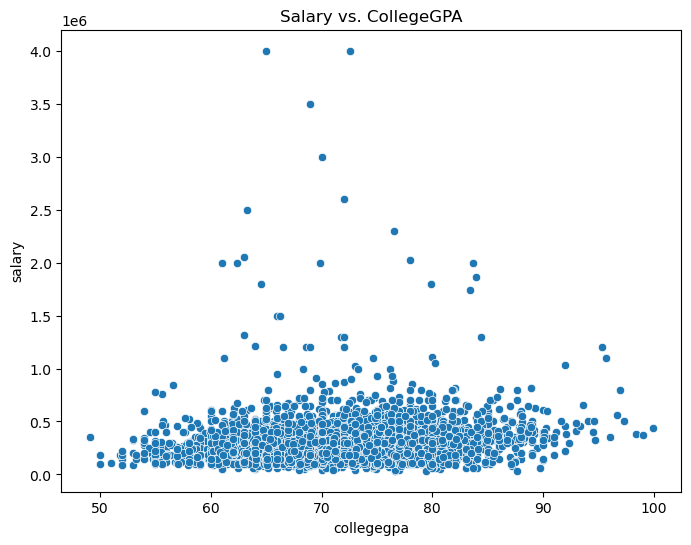

In [50]:


# Scatter plot: Salary vs. CollegeGPA
plt.figure(figsize=(8, 6))
sns.scatterplot(x='collegegpa', y='salary', data=df)
plt.title('Salary vs. CollegeGPA')
plt.show()



* Here from scatter plot, we can most of the students are earning upto 3 lakhs per annum.

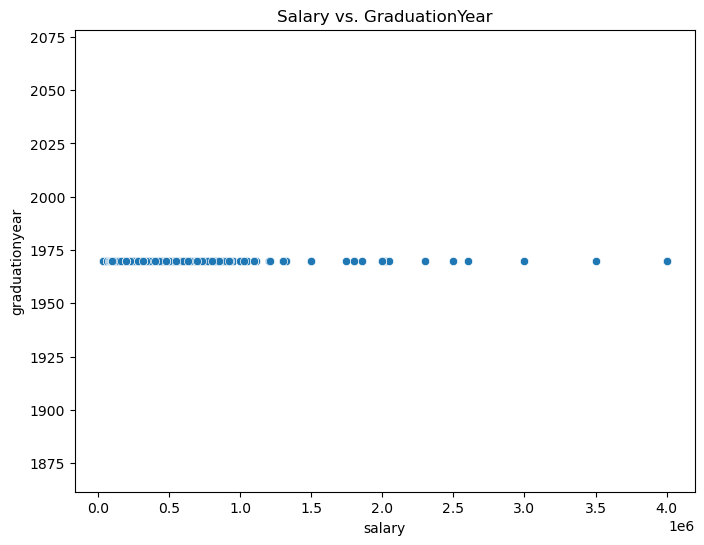

In [51]:
# Scatter plot: Salary vs. GraduationYear
plt.figure(figsize=(8, 6))
sns.scatterplot(x='salary', y='graduationyear', data=df)
plt.title('Salary vs. GraduationYear')
plt.show()



### Designation column



In [52]:
designation_salaries = df.groupby('designation')['salary'].agg(['min', 'max'])

# Sort by max salary in descending order
designation_salaries_sorted = designation_salaries.sort_values(by='max', ascending=False)

top_10_designations = designation_salaries_sorted.head(10)

print(top_10_designations)

                              min      max
designation                               
senior software engineer   215000  4000000
automation engineer        110000  4000000
assistant system engineer  290000  3500000
programmer                  60000  3000000
application developer       40000  2600000
software test engineer      60000  2500000
software developer          50000  2300000
software engineer trainee  105000  2050000
operations analyst         145000  2020000
data scientist             240000  2000000


In [53]:
popular_Designation = df['designation'].value_counts()[:20].index.tolist()
print(popular_Designation)

['software engineer', 'software developer', 'system engineer', 'programmer analyst', 'systems engineer', 'java software engineer', 'software test engineer', 'project engineer', 'technical support engineer', 'senior software engineer', 'java developer', 'test engineer', 'web developer', 'application developer', 'assistant manager', 'network engineer', 'data analyst', 'business analyst', 'engineer', 'android developer']


In [54]:
top_Designations = df[df['designation'].isin(popular_Designation)]
print(f"Unique professions : {len(df['designation'].unique())}")
top_Designations.head()

Unique professions : 419


,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period
1,500000,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,1970,...,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.1076,0.8637,11
2,325000,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,1970,...,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.8682,0.6721,10
3,1100000,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,13
5,300000,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992-07-02,89.92,state board,1970,...,-1,-1,-1,-1,-0.3027,-0.6201,-2.2954,-0.7415,-0.8608,10
6,300000,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state board,1970,...,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1


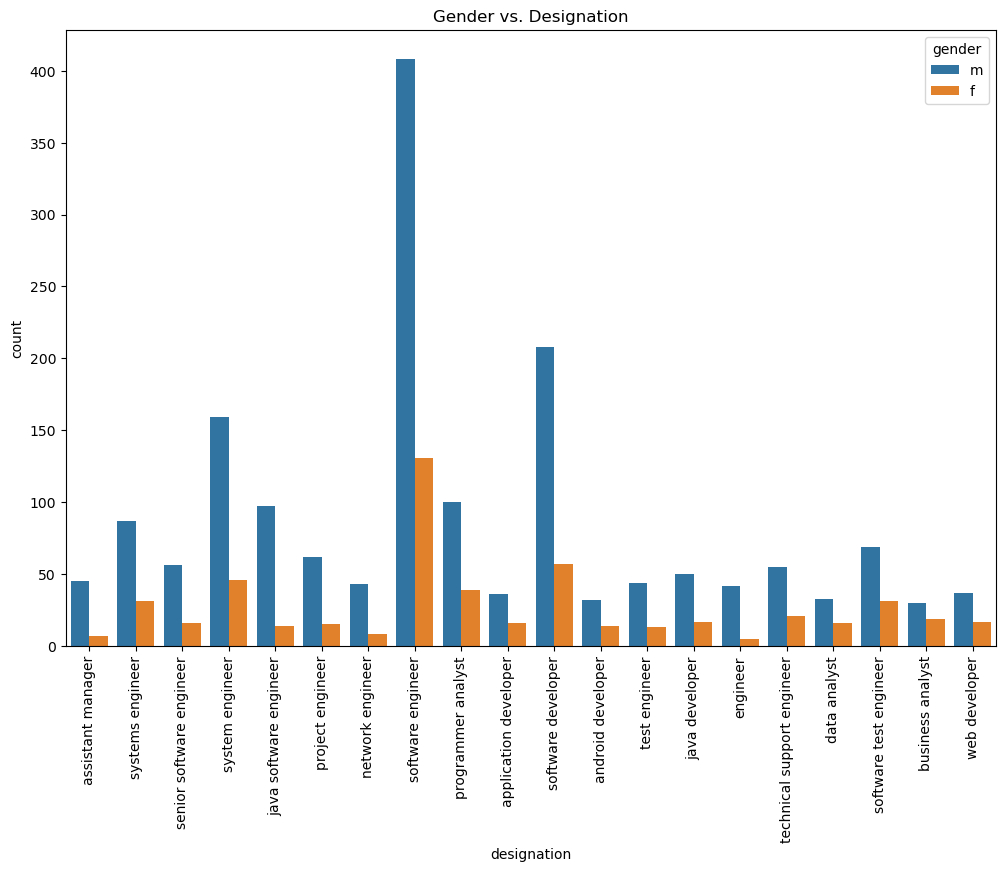

In [70]:
# Bar plot: Gender vs. Designation
plt.figure(figsize=(12, 8))
sns.countplot(x='designation', hue='gender', data=top_Designations)
plt.xticks(rotation=90)
plt.title('Gender vs. Designation')
plt.show()



* Here we can see that software engineer is considered as the top designation of all the designations than comes software developer, system engineer, java software developer and software test engineer.
* Both male and female students has the software engineer as top designation.
* There is an interesting observation that, females are considering career in programmer analyst compared to any other designation after software engineering.


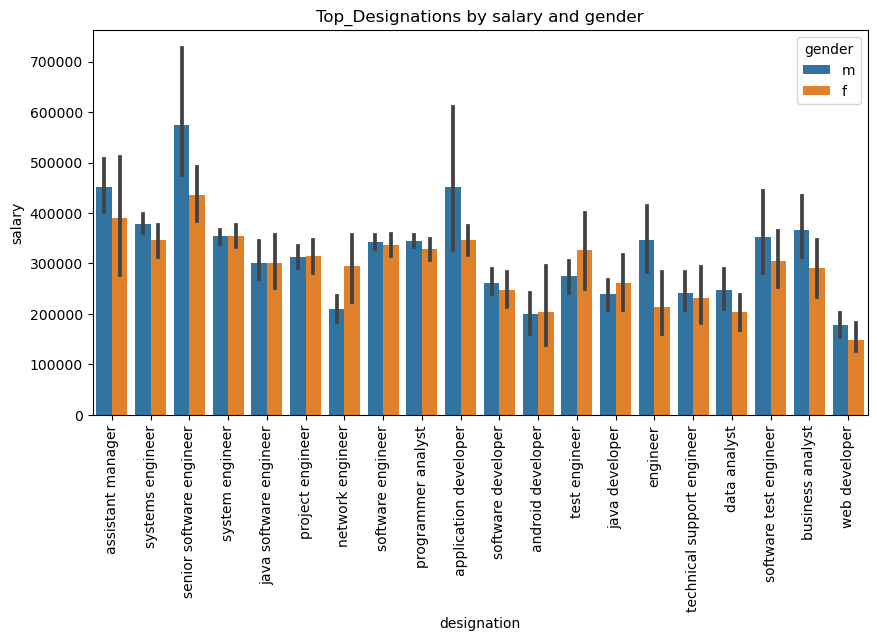

In [56]:
plt.figure(figsize=(10,5))
sns.barplot(x='designation',y='salary',hue='gender',data=top_Designations)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.title('Top_Designations by salary and gender')
plt.show()

* Here Senior software engineer is considered top designation comparing with salary. Than follows assistant manager, application developer,business analyst.
* Almost both female and male are having top designations.


###  Extracting the high paying designations and compaaring them with the gender .

In [57]:
high_pay_job = df[df['designation'].isin(df.sort_values('salary', ascending=False)['designation'].unique()[:20])]
high_pay_job.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period
3,1100000,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970,...,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.4078,-0.9194,13
6,300000,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state board,1970,...,-1,-1,-1,-1,1.7081,-0.1054,-1.0379,-2.0092,-1.0872,1
14,300000,2013-07-01,2024-02-23,java software engineer,Bangalore,m,1992-07-02,81.20,state board,1970,...,-1,-1,-1,-1,0.7027,0.7119,0.0100,-0.9950,0.6721,11
19,325000,2014-09-01,2024-02-23,software engineer,Pune,f,1990-11-30,79.00,cbse,1970,...,-1,-1,-1,-1,0.8192,0.2668,-0.2714,-0.4078,-0.1295,10
20,320000,2010-11-01,2012-09-01,software engineer,Bangalore,f,1988-07-25,91.20,karnataka secondary school of examination,1970,...,-1,-1,-1,-1,-0.1082,0.9688,0.5269,-0.2902,0.3444,2


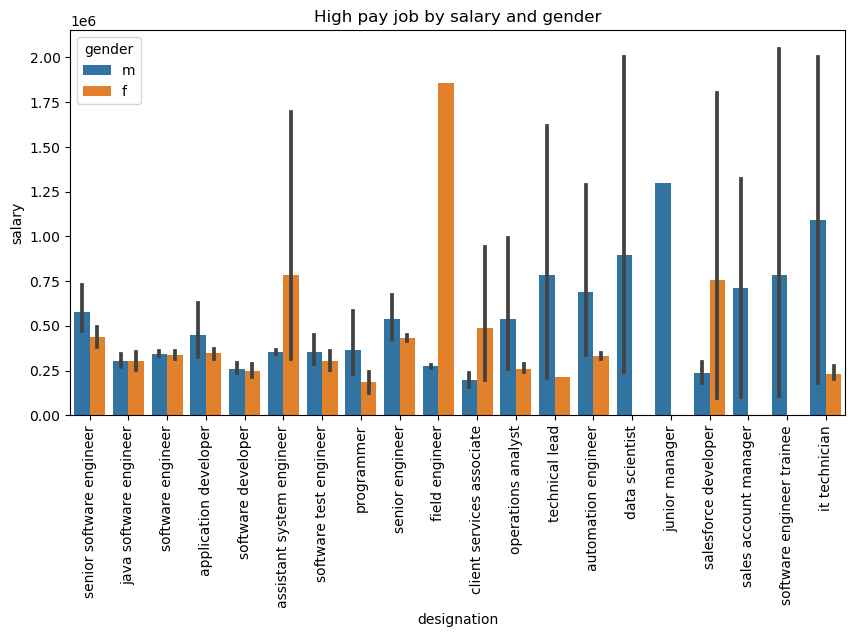

In [58]:
plt.figure(figsize=(10,5))
sns.barplot(x='designation',y='salary',hue='gender',data=high_pay_job)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.title('High pay job by salary and gender')
plt.show()

* Here Field Engineer is the high paying designation and most is paid to female student than followed by assistant system engineer.
* Here there are no female students having salary in data science, junior manager, sales account manager, and software engineer trainee.


#### Checking the salaries of the students where it depends on gender and experience

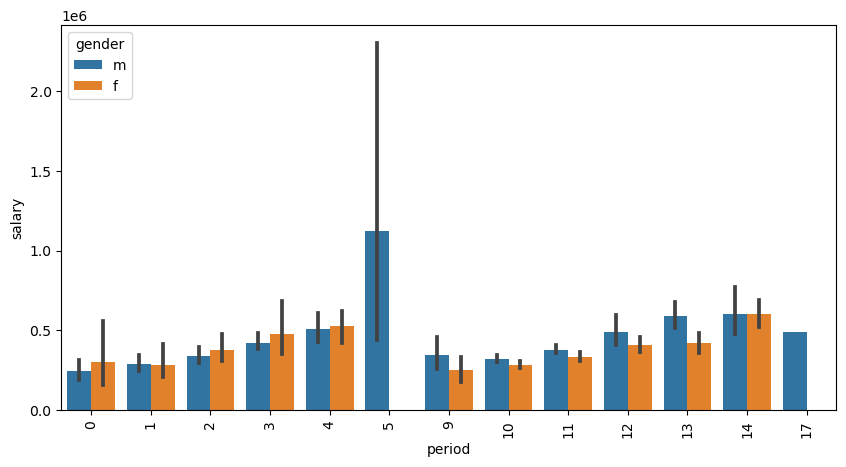

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x='period',y='salary',hue='gender',data=high_pay_job)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=10)
plt.show()

* Here male with 5 years of experience has high salary. 9-11 years of experience irrespective of gender has less salary.

### Find the total percentage of all subject and average of the score of amcat coginitive 

In [60]:
df.columns

Index(['salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecitytier', 'collegestate', 'graduationyear', 'english',
       'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'period'],
      dtype='object')

In [61]:
cognitive_percent = ['english', 'logical', 'quant', 'computerprogramming', 'electronicsandsemicon', 'computerscience', 'mechanicalengg', 'electricalengg', 'telecomengg', 'civilengg']

# Replace -1 with 0 in the specified columns
df[cognitive_percent] = df[cognitive_percent].replace(-1, 0)

# Display the DataFrame to verify the changes
print(df[cognitive_percent])

      english  logical  quant  computerprogramming  electronicsandsemicon  \
0         515      585    525                  445                      0   
1         695      610    780                    0                    466   
2         615      545    370                  395                      0   
3         635      585    625                  615                      0   
4         545      625    465                    0                    233   
...       ...      ...    ...                  ...                    ...   
3993      365      334    475                  345                      0   
3994      415      410    535                  325                    420   
3995      475      475    465                  405                      0   
3996      450      410    320                  445                      0   
3997      565      515    464                  435                      0   

      computerscience  mechanicalengg  electricalengg  telecomengg  civilen

In [62]:
cognitive_percent = ['english',
       'logical', 'quant', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg']

# Step 1: Calculate the row-wise sum of particular columns
df['total_marks'] = df[cognitive_percent].sum(axis=1)

# Step 2: Calculate the percentage of the derived column
df['percentage'] = (df['total_marks'] / 3000) * 100

# Display the DataFrame with the derived column and percentage
df.head()

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,total_marks,percentage
0,420000,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",1970,...,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,12,2070,69.000000
1,500000,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.4,cbse,1970,...,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,2551,85.033333
2,325000,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.0,cbse,1970,...,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1925,64.166667
3,1100000,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,1970,...,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,2460,82.000000
4,200000,2014-03-01,2015-03-01,eee,Manesar,m,1991-02-27,78.0,cbse,1970,...,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1868,62.266667


### Correlation Heatmap of personality_test
* Viewing the relationship between the personality test columns as they are normalized fromm the dataset

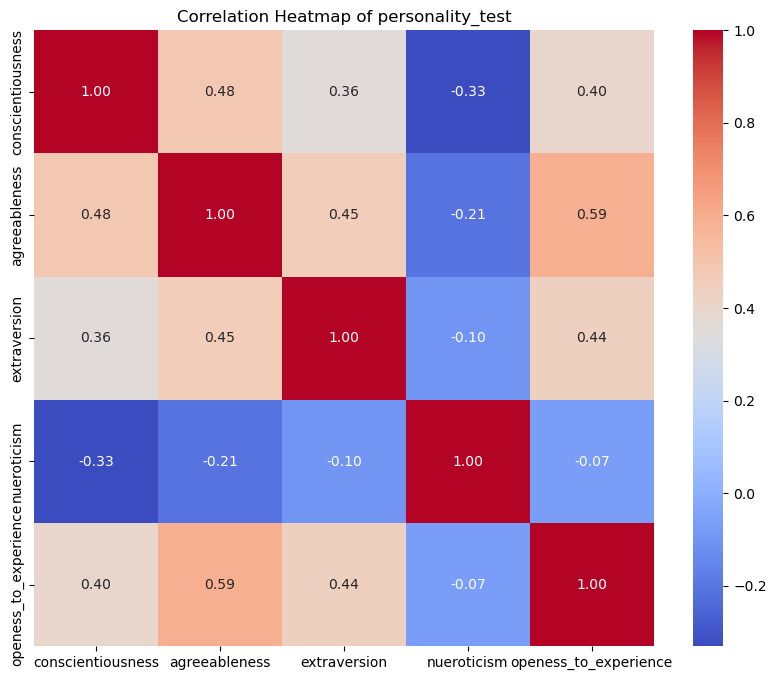

In [63]:
personality_test = ['conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']  # Add your desired column names here

# Subset the DataFrame to include only the selected columns
selected_df = df[personality_test]

# Compute the correlation matrix
correlation_matrix = selected_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of personality_test')
plt.show()

#### Performing the hypothesis Testing 

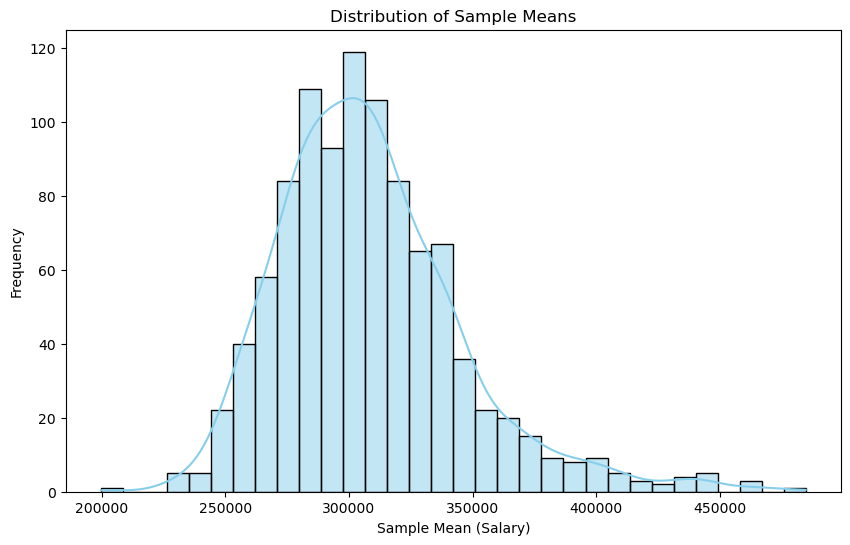

T-statistic: 175.6176618197049
P-value: 0.0
Reject the null hypothesis. There is sufficient evidence to conclude that the population mean salary is not equal to the assumed value.


In [64]:
from scipy import stats

# Extract the 'Salary' column from the dataset
population = df['salary'].values

# Step 1: Generate sample means
sample_means = []
num_samples = 1000  # Number of samples
sample_size = 30  # Size of each sample

for _ in range(num_samples):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_means.append(np.mean(sample))

# Step 2: Visualize the distribution of sample means
plt.figure(figsize=(10, 6))
sns.histplot(sample_means, kde=True, color='skyblue')
plt.title('Distribution of Sample Means')
plt.xlabel('Sample Mean (Salary)')
plt.ylabel('Frequency')
plt.show()

# Step 3: Perform hypothesis testing
# Null hypothesis: The population mean salary is equal to a certain value (e.g., 100,000 INR)
# Alternative hypothesis: The population mean salary is not equal to the assumed value

assumed_mean_salary = 100000  # Assumed population mean salary
alpha = 0.05  # Significance level

t_statistic, p_value = stats.ttest_1samp(sample_means, assumed_mean_salary)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is sufficient evidence to conclude that the population mean salary is not equal to the assumed value.")
else:
    print("Fail to reject the null hypothesis. There is not sufficient evidence to conclude that the population mean salary is not equal to the assumed value.")

#### Observation:
* Conclusion: Since the P-value is below the significance level (alpha) of 0.05 (commonly used threshold), we reject the null hypothesis. This means that there is sufficient evidence to conclude that the population mean salary is not equal to the assumed value of 100,000 INR.

* In summary, based on the statistical analysis, we have strong evidence to suggest that the population mean salary differs significantly from the assumed value of 100,000 INR.

#### Research Questions
*	Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.
*	Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


In [65]:
df.head(10)

,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,12graduation,...,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,period,total_marks,percentage
0,420000,2012-06-01,2024-02-23,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",1970,...,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455,12,2070,69.000000
1,500000,2013-09-01,2024-02-23,assistant manager,Indore,m,1989-10-04,85.40,cbse,1970,...,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637,11,2551,85.033333
2,325000,2014-06-01,2024-02-23,systems engineer,Chennai,f,1992-08-03,85.00,cbse,1970,...,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721,10,1925,64.166667
3,1100000,2011-07-01,2024-02-23,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,1970,...,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194,13,2460,82.000000
4,200000,2014-03-01,2015-03-01,eee,Manesar,m,1991-02-27,78.00,cbse,1970,...,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,1,1868,62.266667
5,300000,2014-06-01,2024-02-23,system engineer,Hyderabad,m,1992-07-02,89.92,state board,1970,...,0,0,-0.3027,-0.6201,-2.2954,-0.74150,-0.8608,10,2787,92.900000
6,300000,2014-08-01,2015-05-01,java software engineer,Banglore,m,1993-02-01,86.08,state board,1970,...,0,0,1.7081,-0.1054,-1.0379,-2.00920,-1.0872,1,2156,71.866667
7,400000,2014-07-01,2015-07-01,mechanical engineer,Bangalore,m,1992-05-27,92.00,cbse,1970,...,0,0,-0.0154,1.2114,0.0100,0.14590,1.2470,1,2159,71.966667
8,600000,2013-07-01,2024-02-23,electrical engineer,Noida,m,1991-09-17,90.00,cbse,1970,...,0,0,-0.1590,0.5454,-0.6048,-0.74150,-0.2859,11,2916,97.200000
9,230000,2014-07-01,2024-02-23,project engineer,Kolkata,m,1993-06-13,77.00,cbse,1970,...,0,0,-1.3080,0.5454,-0.9122,0.90660,0.0973,10,2424,80.800000


#### Performing Chi-square testing for independence to see the relationship between the gender and specialization 

In [66]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['gender'], df['specialization'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Chi-square value:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

Chi-square value: 50.2678532729165
P-value: 1.2797210403872346e-08
Degrees of freedom: 7
Expected frequencies table:
[[6.94172086e+00 3.83230865e+02 4.78739370e-01 1.98676838e+01
  3.14292396e+02 1.65165083e+02 5.26613307e+01 1.43621811e+01]
 [2.20582791e+01 1.21776913e+03 1.52126063e+00 6.31323162e+01
  9.98707604e+02 5.24834917e+02 1.67338669e+02 4.56378189e+01]]


* Observasions: The p-value (1.27) is much greater than the significance level (e.g., 0.05). Therefore, we fail to reject the null hypothesis. This suggests that there is no significant relationship between gender and specialization in the dataset. In other words, the preference of specialization does not depend on gender according to the given data.

* To test the claim made in the article using the provided data, we need to filter the dataset to include only the individuals who have completed Computer Science Engineering and are working in the specified job roles. Then, we can calculate the average salary of these individuals and compare it with the claim.

In [67]:
cs_graduates = df[df['specialization'] == 'computer science']

# Filter the dataset for individuals working in specified job roles
specified_job_roles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
specified_jobs = cs_graduates[cs_graduates['designation'].isin(specified_job_roles)]

# Calculate the average salary of individuals in these job roles
average_salary = specified_jobs['salary'].mean()
print("Average salary of individuals in specified job roles:", average_salary)

# Compare with the claim
claim_lower_bound = 250000
claim_upper_bound = 300000
if average_salary >= claim_lower_bound and average_salary <= claim_upper_bound:
    print("The claim holds true based on the data.")
else:
    print("The claim does not hold true based on the data.")


Average salary of individuals in specified job roles: nan
The claim does not hold true based on the data.


#### here is the Perform one-sample t-test to conform this 

In [68]:
t_stat, p_value = stats.ttest_1samp(specified_jobs['salary'], (claim_lower_bound + claim_upper_bound) / 2)
print("Test statistic:", t_stat)
print("P-value:", p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. The claim does not hold true based on the data.")
else:
    print("Fail to reject the null hypothesis. The claim holds true based on the data.")

Test statistic: nan
P-value: nan
Fail to reject the null hypothesis. The claim holds true based on the data.
